# Exercise 2: Decision Trees


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 21 features and the class:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
1. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
1. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
1. bruises: bruises=t,no=f
1. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
1. gill-attachment: attached=a,descending=d,free=f,notched=n
1. gill-spacing: close=c,crowded=w,distant=d
1. gill-size: broad=b,narrow=n
1. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
1. stalk-shape: enlarging=e,tapering=t
1. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. veil-type: partial=p,universal=u
1. veil-color: brown=n,orange=o,white=w,yellow=y
1. ring-number: none=n,one=o,two=t
1. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
1. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
1. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
1. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
data = data.dropna(axis=1)
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


We will split the dataset to `training` and `test` sets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)
print(X.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)
(8124, 22)


## Impurity Measures (10 points)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy` in `hw2.py`. You are encouraged to test your implementation according to the expected behavior of those measures as seen in class. (5 points each)

In [7]:
from hw2 import calc_gini, calc_entropy

In [8]:
##### Your tests here #####

calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split (10 Points)

Given some feature, the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$

Implement the function `goodness_of_split` in `hw2.py`.

In [9]:
from hw2 import goodness_of_split

In [10]:
##### Your tests here #####

# python support passing a function as arguments to another function.

goodness_gini, split_values_gini = goodness_of_split(X, 0, calc_gini)
goodness_entropy, split_values_entropy = goodness_of_split(X, 0, calc_entropy)

goodness_gini, goodness_entropy

(0.0199596578344422, 0.030727291723502415)

## Building a Decision Tree (35 points)

Implement the class `DecisionNode` in `hw2.py`.

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes that appear in `hw2.py`. 
1. Note the following attributes and methods for each node:
    1. `self.data` holds the relevant data to split that node (ndarray).
    1. `self.feature` holds the best feature that splits the node (int).
    1. `self.pred` holds the prediction of the entire node (string).
    1. `self.depth` holds the depth of the node (int).
    1. `self.children` holds the objects of the children of the node (list).
    1. `self.children_values` holds the value of the feature associated with the children (list).
    1. `self.terminal` determines if the node is a leaf (boolean).
    1. `self.chi` holds the chi square value (int).
    1. `self.max_depth` holds the maximum allowed depth of the entire tree (int).
    1. `self.gain_ratio` determines if gain_ratio is used (boolean).

1. Your code should support both Gini and Entropy as impurity measures. 
1. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.
1. Complete the class `DecisionNode`. Implementation details are up to you, but maintain the function signature and outputs. Make sure you are not changing the provided functions / variables we provided.
1. You can create auxiliary functions, methods and variables.
1. Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class.

In [11]:
from hw2 import build_tree, DecisionNode

In [12]:
##### Your tests here #####
# new_node = DecisionNode(X)

tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation (10 points) 

Implement the functions `predict` and `calc_accuracy` in `hw2.py`

In [950]:
from hw2 import calc_accuracy, predict

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [951]:
##### Your tests here #####

# instance = X_test[1, :]
# print(instance[-1])
# print(predict(tree_entropy_gain_ratio, instance))

print('gini', calc_accuracy(tree_gini, X_train), calc_accuracy(tree_gini, X_test))
print('entropy', calc_accuracy(tree_entropy, X_train), calc_accuracy(tree_entropy, X_test))
print('entropy gain ratio', calc_accuracy(tree_entropy_gain_ratio, X_train), 
      calc_accuracy(tree_entropy_gain_ratio, X_test))

gini 100.0 77.30182176267849
entropy 100.0 77.15411127523387
entropy gain ratio 100.0 78.53274249138356


## Depth pruning (15 points)

In this part, we will investigate the effect the max depth of the tree has on the training and testing accuracies.

For each max_depth value in the range [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], construct a tree and prune it according to the max_depth value (don't let the tree to grow beyond this depth). Next, calculate the training and testing accuracy on the resulting trees. 

In order to debug and self-test your code, draw the training and testing accuracy as a function of the max_depth and verify that your results make sense. The red dot denotes the best model according to the testing accuracy.

Implement the function `depth_pruning` in `hw2.py`.

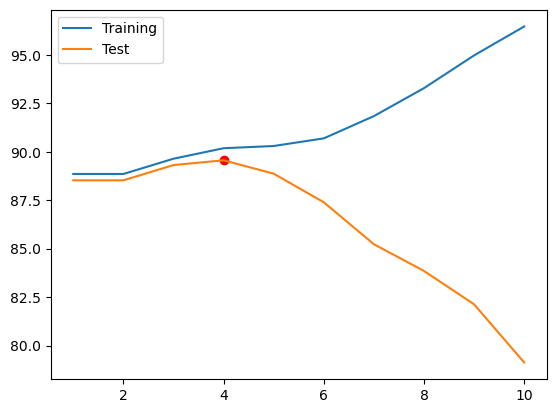

In [952]:
##### Your tests here #####
from hw2 import depth_pruning
depth_training_acc, depth_testing_acc = depth_pruning(X_train, X_test)

plt.plot(range(1, 11), depth_training_acc, label='Training')
plt.plot(range(1, 11), depth_testing_acc, label='Test')
plt.scatter(np.argmax(depth_testing_acc)+1, max(depth_testing_acc), c='r')
plt.legend();

## Chi square pre-pruning (15 points)

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy on the resulting trees. 

In order to debug and self-test your code, draw the training and testing accuracy as a function of the tuple (p-value, tree depth) and verify that your results make sense. The red dot denotes the best model according to the testing accuracy.

Implement the function `chi_pruning` in `hw2.py`.

In [953]:
from hw2 import chi_pruning

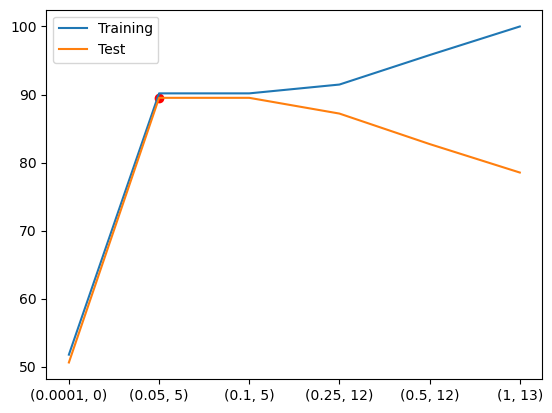

In [954]:
##### Your tests here #####

chi_training_acc, chi_testing_acc, depth = chi_pruning(X_train, X_test)

chi_depth_tuple = [str((x, y)) for x, y in zip([1, 0.5, 0.25, 0.1, 0.05, 0.0001], depth)][::-1]
plt.plot(chi_depth_tuple, chi_training_acc[::-1], label='Training')
plt.plot(chi_depth_tuple, chi_testing_acc[::-1], label='Test')
plt.scatter(chi_depth_tuple[np.argmax(chi_testing_acc[::-1])], max(chi_testing_acc), c='r')
plt.legend();

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [ ]:
tree_max_depth = build_tree(X_train, calc_entropy, True, max_depth=4)
tree_chi = build_tree(X_train, calc_entropy, True, 0.05)

## Number of Nodes (5 points) 

Of the two trees above we will choose the one with fewer nodes.

Complete the function counts_nodes and print the number of nodes in each tree

Implement the function `count_nodes` in `hw2.py`.

In [ ]:
from hw2 import count_nodes

In [ ]:
##### Your tests here #####

print(count_nodes(tree_max_depth))
print(count_nodes(tree_chi))
# print(count_nodes(tree_entropy_gain_ratio))

205
45


## Print the tree

We provided you with a function that should print your tree for your own debugging purposes. 

This code prints:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
       [X5=a, leaf]: [{1.0: 5}]
       [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```

In [882]:
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    if node.terminal == False:
        if node.depth == 0:
            print('[ROOT, feature=X{}]'.format(node.feature))
        else:
            print('{}[X{}={}, feature=X{}], Depth: {}'.format(depth*'  ', parent_feature, feature_val, 
                                                              node.feature, node.depth))
        for i, child in enumerate(node.children):
            print_tree(child, depth+1, node.feature, node.children_values[i])
    else:
        classes_count = {}
        labels, counts = np.unique(node.data[:, -1], return_counts=True)
        for l, c in zip(labels, counts):
            classes_count[l] = c
        print('{}[X{}={}, leaf]: [{}], Depth: {}'.format(depth*'  ', parent_feature, feature_val,
                                                         classes_count, node.depth))

In [883]:
print_tree(tree_max_depth)
print_tree(tree_chi)

[ROOT, feature=X4]
  [X4=a, feature=X2], Depth: 1
    [X2=n, feature=X8], Depth: 2
      [X8=n, feature=X19], Depth: 3
        [X19=s, leaf]: [{'e': 4, 'p': 3}], Depth: 4
        [X19=y, leaf]: [{'e': 8}], Depth: 4
      [X8=p, feature=X0], Depth: 3
        [X0=f, leaf]: [{'e': 2, 'p': 1}], Depth: 4
        [X0=x, leaf]: [{'e': 7}], Depth: 4
      [X8=w, feature=X18], Depth: 3
        [X18=k, leaf]: [{'e': 5, 'p': 1}], Depth: 4
        [X18=n, leaf]: [{'e': 7}], Depth: 4
    [X2=w, feature=X6], Depth: 2
      [X6=c, feature=X8], Depth: 3
        [X8=g, leaf]: [{'e': 22, 'p': 1}], Depth: 4
        [X8=k, leaf]: [{'e': 22, 'p': 4}], Depth: 4
        [X8=n, leaf]: [{'e': 26, 'p': 1}], Depth: 4
        [X8=w, leaf]: [{'e': 16, 'p': 1}], Depth: 4
      [X6=w, leaf]: [{'e': 21}], Depth: 3
    [X2=y, feature=X6], Depth: 2
      [X6=c, feature=X8], Depth: 3
        [X8=g, leaf]: [{'e': 24, 'p': 2}], Depth: 4
        [X8=k, leaf]: [{'e': 22, 'p': 1}], Depth: 4
        [X8=n, leaf]: [{'e': 28, '